Scaling or Normalization - Only done for inputs 

Before noramlization/Scalling 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

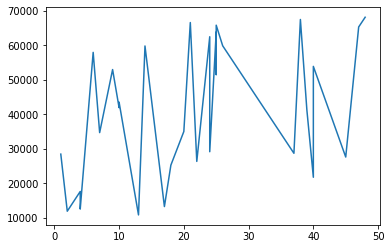

In [2]:
np.random.seed(0) # random ,seed(0) keeps the genrated values constant 
x1 =np.random.randint(1,50,30) 
#using numpy acess the random package and randint lib in the range of 1-50 generate 30 integer
x1=np.sort(x1) #sorting the values  generated for x1
x2 =np.random.randint(10000,70000,30) 
plt.plot(x1,x2)

In [3]:
#After normalization 

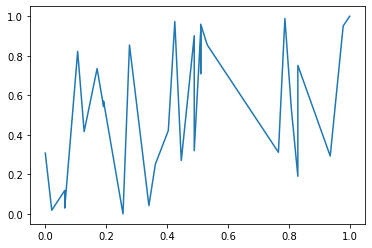

In [4]:
x1min = min(x1)
x1max = max(x1)
x2min = min(x2)
x2max = max(x2)
x1norm = (x1-x1min)/(x1max-x1min)
x2norm = (x2-x2min)/(x2max-x2min)
plt.plot(x1norm,x2norm)

In [5]:
#here two graphs are about normalization showing  u the working of noramlization 

#logistic regression

In [6]:
#1st step to Gather data and crate a dataframe
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Mall_Customers.csv')
df 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#step4- dividing inputs and outputs
#input -age and sallary 
#output - purchased
#input should be 2 dimentional
#output should be 1 dimentional

In [21]:
x =df.iloc[:,0:5].values
x

array([[1, 'Male', 19, 15, 39],
       [2, 'Male', 21, 15, 81],
       [3, 'Female', 20, 16, 6],
       [4, 'Female', 23, 16, 77],
       [5, 'Female', 31, 17, 40],
       [6, 'Female', 22, 17, 76],
       [7, 'Female', 35, 18, 6],
       [8, 'Female', 23, 18, 94],
       [9, 'Male', 64, 19, 3],
       [10, 'Female', 30, 19, 72],
       [11, 'Male', 67, 19, 14],
       [12, 'Female', 35, 19, 99],
       [13, 'Female', 58, 20, 15],
       [14, 'Female', 24, 20, 77],
       [15, 'Male', 37, 20, 13],
       [16, 'Male', 22, 20, 79],
       [17, 'Female', 35, 21, 35],
       [18, 'Male', 20, 21, 66],
       [19, 'Male', 52, 23, 29],
       [20, 'Female', 35, 23, 98],
       [21, 'Male', 35, 24, 35],
       [22, 'Male', 25, 24, 73],
       [23, 'Female', 46, 25, 5],
       [24, 'Male', 31, 25, 73],
       [25, 'Female', 54, 28, 14],
       [26, 'Male', 29, 28, 82],
       [27, 'Female', 45, 28, 32],
       [28, 'Male', 35, 28, 61],
       [29, 'Female', 40, 29, 31],
       [30, 'Female', 23

In [26]:
y =df.iloc[:,4].values
y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83])

In [23]:
#train and test variable 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

#random_state is very simliar to random.seed(0)
#the moment we erun the train_test_split
#by default 75%  of training data goes to train vriable and rest 25% goes for testing data.


In [22]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(200, 5)
(150, 3)
(50, 3)


In [24]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(200,)
(150,)
(50,)


In [27]:
#step-6 NORMALIZATION OR SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train) #here we scalling the x_train data by using MinMaxscaler and saving it into the x_train variable
x_test=scaler.fit_transform(x_test)

ValueError: ignored

In [15]:
#Step 7
#running a classifier,regressor ,clusturer
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [16]:
#step-8 
#predicting the model
model.fit(x_train,y_train) #we using x_train,y-train values to train and fit the values


LogisticRegression()

In [17]:
#step 9 predicting the model
y_pred =model.predict(x_test)
y_pred

array([42, 42, 55, 42, 42, 42, 42, 42, 14, 42, 42, 42, 42, 42, 55, 73, 73,
       42, 42, 55, 75, 75, 42, 42, 55, 55, 75, 75, 42, 42, 42, 42, 42, 42,
       42, 75, 55, 42, 42, 55, 42, 42, 42, 42, 42, 55, 14, 42, 55, 75])

In [18]:
y_test

array([29, 13, 46, 42, 69, 15, 76, 36, 15, 20, 55, 77, 32, 16, 51, 94, 92,
        9, 73, 47, 88, 97, 65, 73, 56, 91, 90, 97, 58, 28, 35, 41, 17, 54,
        5, 85, 75, 40, 44, 50,  5, 50, 32, 46, 27, 59,  3, 54, 43, 87])

In [19]:
#step 10 finding the accuracy of the system
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

2.0

In [ ]:
#individual prediction 
model.predict([[25,5000]])

array([83])